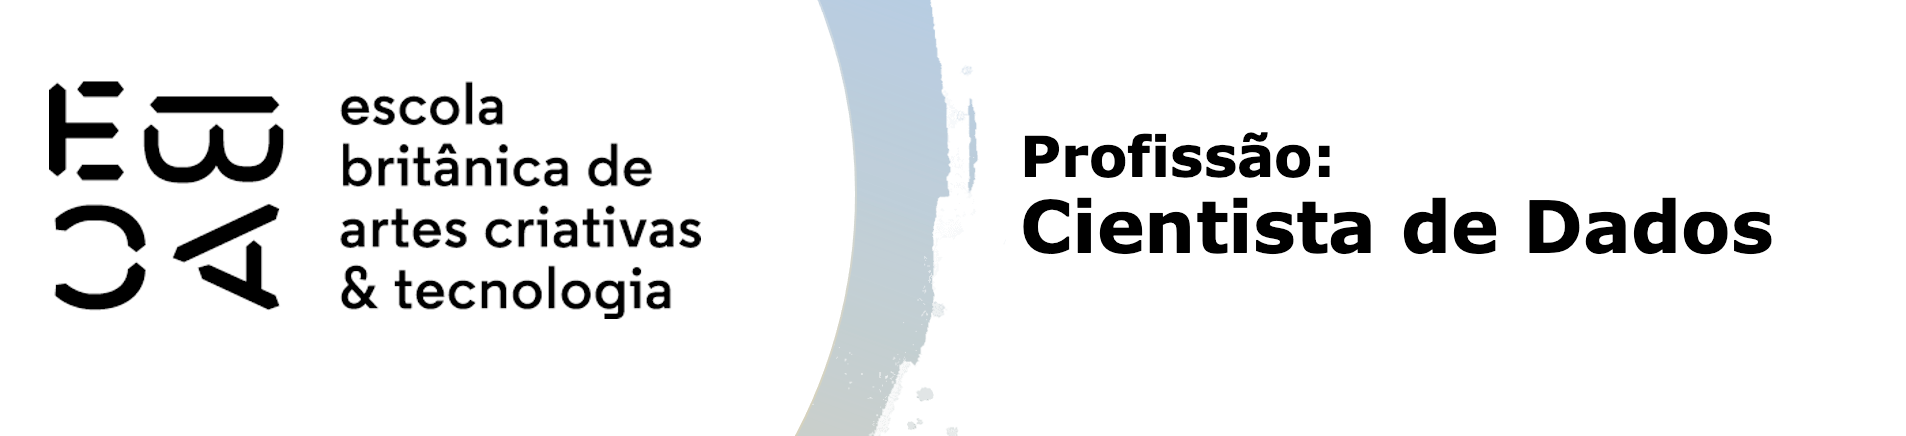

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
df.describe()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,750000.000000,750000.000000,750000.000000,624240.000000,750000.000000,7.500000e+05
mean,8319.025636,0.433267,43.796907,7.746165,2.212315,2.397742e+04
std,4810.382817,0.738516,11.229454,6.684181,0.903041,9.039973e+04
min,0.000000,0.000000,22.000000,0.117808,1.000000,9.530000e+01
25%,4147.000000,0.000000,34.000000,3.049315,2.000000,3.469370e+03
50%,8324.000000,0.000000,43.000000,6.046575,2.000000,7.929980e+03
75%,12490.000000,1.000000,53.000000,10.180822,3.000000,1.864716e+04
max,16649.000000,14.000000,68.000000,42.906849,15.000000,6.802261e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [5]:
# Substituindo valores faltantes (NaN) pela média de cada coluna
df.fillna(df.mean(numeric_only=True), inplace=True)


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [6]:
# Considerando df já carregado com o index sendo a data_ref:
df.reset_index(inplace=True)


In [7]:
# Garantir que data_ref está como datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Ordena pela data (por segurança)
df.sort_values('data_ref', inplace=True)

# Define data de corte (3 últimos meses)
data_limite = df['data_ref'].max() - pd.DateOffset(months=3)

# Divide entre treino e teste
df_train = df[df['data_ref'] < data_limite].copy()
df_test = df[df['data_ref'] >= data_limite].copy()



In [8]:
# Variável-alvo
y_train = df_train['renda']
y_test = df_test['renda']

# Features (incluindo data_ref, se quiser manter como variável)
X_train = df_train.drop(columns=['renda'])
X_test = df_test.drop(columns=['renda'])

# Opcional: extrair informações temporais
X_train['mes'] = X_train['data_ref'].dt.month
X_train['ano'] = X_train['data_ref'].dt.year

X_test['mes'] = X_test['data_ref'].dt.month
X_test['ano'] = X_test['data_ref'].dt.year

# Remove data_ref (mantemos só mês e ano, por exemplo)
X_train.drop(columns=['data_ref'], inplace=True)
X_test.drop(columns=['data_ref'], inplace=True)

# One-hot encoding para variáveis categóricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinha colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predição
y_pred = modelo.predict(X_test)

# R²
r2 = r2_score(y_test, y_pred)

# R² ajustado
n = X_test.shape[0]
p = X_test.shape[1]
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R²: {r2:.4f}")
print(f"R² ajustado: {r2_ajustado:.4f}")


R²: -1.8343
R² ajustado: -1.8347


In [10]:
df['log_renda'] = np.log(df['renda'])


In [11]:
# Define data limite para separar 3 últimos meses
data_limite = df['data_ref'].max() - pd.DateOffset(months=3)

# Divide entre treino e teste
df_train = df[df['data_ref'] < data_limite].copy()
df_test = df[df['data_ref'] >= data_limite].copy()


In [12]:
# NOVA variável-alvo: log da renda
y_train = df_train['log_renda']
y_test = df_test['log_renda']

# Features
X_train = df_train.drop(columns=['renda', 'log_renda'])
X_test = df_test.drop(columns=['renda', 'log_renda'])

# Criar colunas de ano e mês
X_train['mes'] = X_train['data_ref'].dt.month
X_train['ano'] = X_train['data_ref'].dt.year
X_test['mes'] = X_test['data_ref'].dt.month
X_test['ano'] = X_test['data_ref'].dt.year

# Remove data_ref (já extraímos info temporal)
X_train.drop(columns=['data_ref'], inplace=True)
X_test.drop(columns=['data_ref'], inplace=True)

# One-hot encoding para variáveis categóricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinha colunas entre treino e teste
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Treina o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predições (em log)
y_pred = modelo.predict(X_test)

# Avaliação em log
r2 = r2_score(y_test, y_pred)

# R² ajustado
n = X_test.shape[0]
p = X_test.shape[1]
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² (log): {r2:.4f}")
print(f"R² ajustado (log): {r2_ajustado:.4f}")


R² (log): -0.2649
R² ajustado (log): -0.2650


<Axes: xlabel='log_renda', ylabel='Count'>

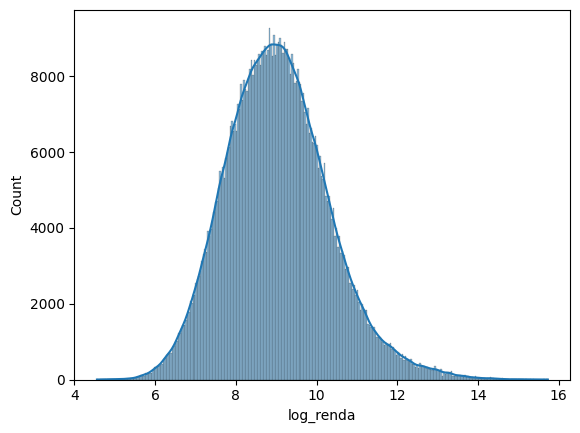

In [14]:
import seaborn as sns
sns.histplot(df['log_renda'], kde=True)

In [15]:
df.corr(numeric_only=True)['log_renda'].sort_values(ascending=False)


log_renda                1.000000
tempo_emprego            0.613297
renda                    0.484456
idade                    0.117096
qt_pessoas_residencia   -0.019221
index                   -0.020897
qtd_filhos              -0.025203
Name: log_renda, dtype: float64

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Remove index e data_ref (caso ainda existam)
X_train = df_train.drop(columns=['renda', 'log_renda', 'index', 'data_ref'], errors='ignore')
X_test = df_test.drop(columns=['renda', 'log_renda', 'index', 'data_ref'], errors='ignore')

# Alvo
y_train = df_train['log_renda']
y_test = df_test['log_renda']

# One-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinhar colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predição
y_pred = modelo.predict(X_test)

# R² e R² ajustado
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² (log): {r2:.4f}")
print(f"R² ajustado (log): {r2_ajustado:.4f}")


R² (log): -0.5116
R² ajustado (log): -0.5117


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


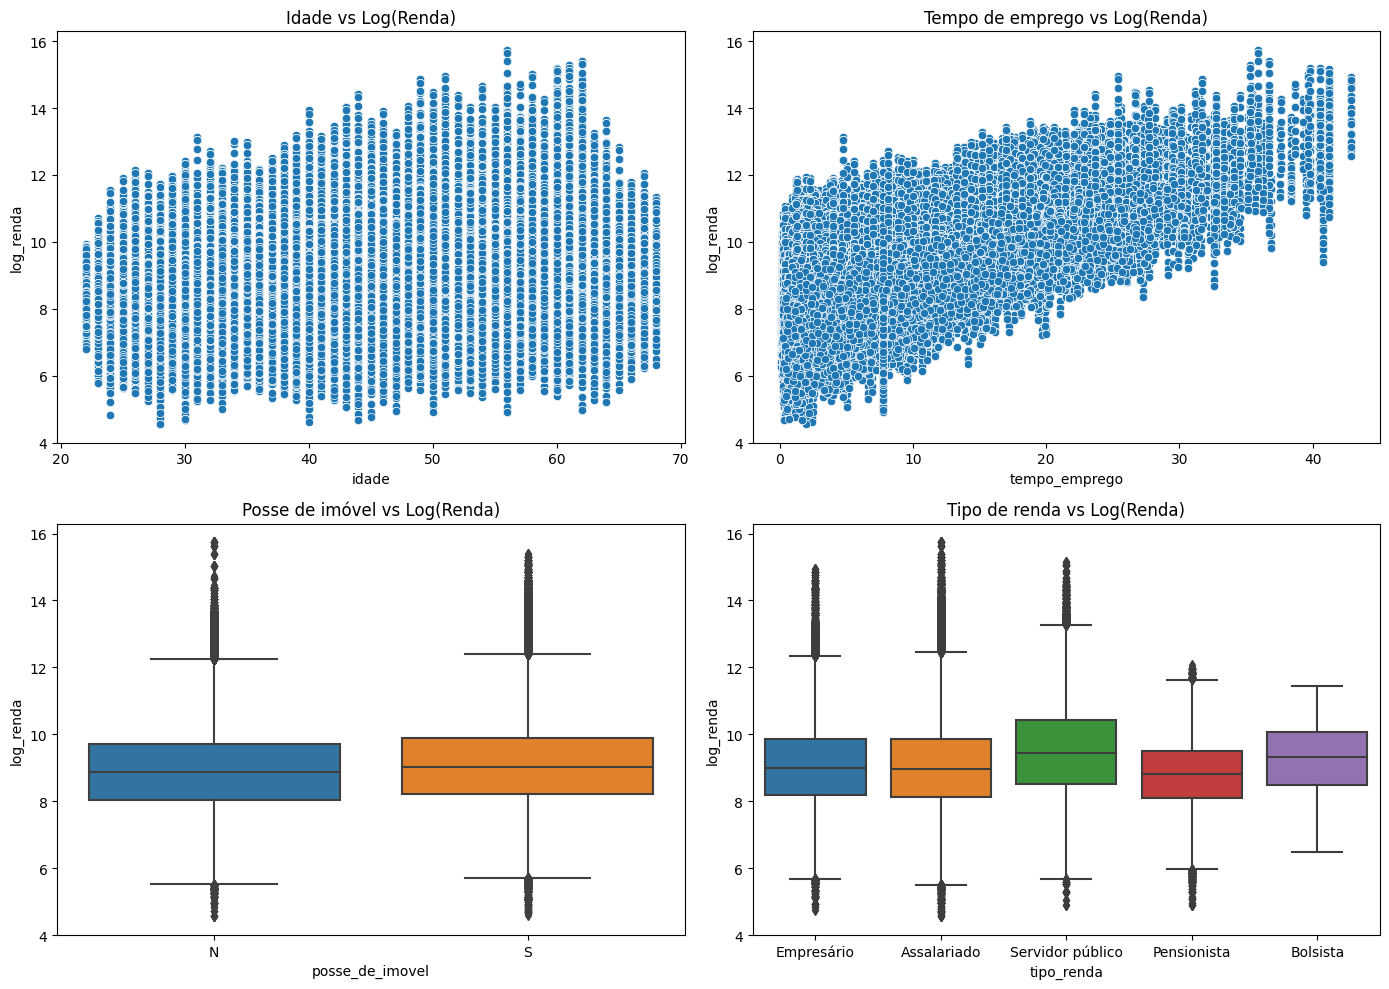

In [17]:
# Aplicando log na variável alvo (Renda) para tentar linearizar relações
df['log_renda'] = np.log(df['renda'])

# Visualizando relação entre algumas variáveis e log_renda
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='idade', y='log_renda', ax=axes[0, 0])
axes[0, 0].set_title('Idade vs Log(Renda)')

sns.scatterplot(data=df, x='tempo_emprego', y='log_renda', ax=axes[0, 1])
axes[0, 1].set_title('Tempo de emprego vs Log(Renda)')

sns.boxplot(data=df, x='posse_de_imovel', y='log_renda', ax=axes[1, 0])
axes[1, 0].set_title('Posse de imóvel vs Log(Renda)')

sns.boxplot(data=df, x='tipo_renda', y='log_renda', ax=axes[1, 1])
axes[1, 1].set_title('Tipo de renda vs Log(Renda)')

plt.tight_layout()
plt.show()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Suponha que y_test = dados reais e y_pred = previsão do modelo
# Se você usou log(renda), aplique exp para voltar à escala original:
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

# Cálculo das métricas
r2 = r2_score(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)

print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


R²: -1.8102
RMSE: 47195.35
MAE: 13677.30


Gráfico de comparação entre renda real e prevista


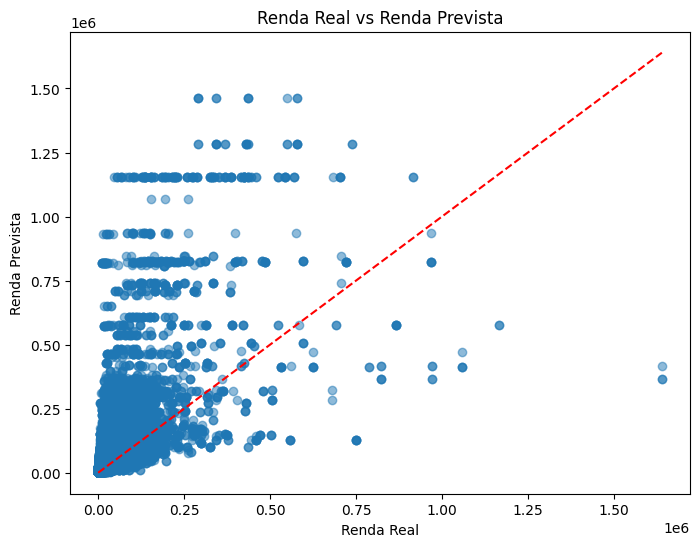

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista')
plt.title('Renda Real vs Renda Prevista')
plt.show()
